In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import xlrd

In [2]:
# step 1
DATA_FILE = '/Users/mingchang/Downloads/fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [3]:
data

array([[   6.2,   29. ],
       [   9.5,   44. ],
       [  10.5,   36. ],
       [   7.7,   37. ],
       [   8.6,   53. ],
       [  34.1,   68. ],
       [  11. ,   75. ],
       [   6.9,   18. ],
       [   7.3,   31. ],
       [  15.1,   25. ],
       [  29.1,   34. ],
       [   2.2,   14. ],
       [   5.7,   11. ],
       [   2. ,   11. ],
       [   2.5,   22. ],
       [   4. ,   16. ],
       [   5.4,   27. ],
       [   2.2,    9. ],
       [   7.2,   29. ],
       [  15.1,   30. ],
       [  16.5,   40. ],
       [  18.4,   32. ],
       [  36.2,   41. ],
       [  39.7,  147. ],
       [  18.5,   22. ],
       [  23.3,   29. ],
       [  12.2,   46. ],
       [   5.6,   23. ],
       [  21.8,    4. ],
       [  21.6,   31. ],
       [   9. ,   39. ],
       [   3.6,   15. ],
       [   5. ,   32. ],
       [  28.6,   27. ],
       [  17.4,   32. ],
       [  11.3,   34. ],
       [   3.4,   17. ],
       [  11.9,   46. ],
       [  10.5,   42. ],
       [  10.7,   43. ],


In [4]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
#Y_predicted = X * w + b 
Y_predicted = tf.add(tf.multiply(X, w), b)

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [5]:
# Step 7: start a TF session and train the model
with tf.Session() as sess:
    # initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    # train the model
    for i in range(100): # train the model 100 times
        for x, y in data:
            # Session runs train_op and fetch values of loss
            sess.run(optimizer, feed_dict={X: x, Y: y})
    w_value, b_value = sess.run([w, b])

In [6]:
print w_value, b_value

1.71838 15.7892


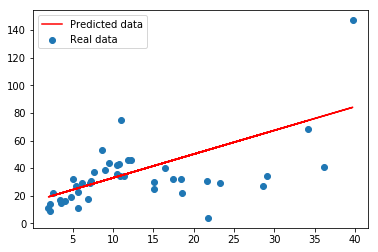

In [7]:
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline

X, Y = data.T[0], data.T[1]
plt.scatter(X, Y, label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()